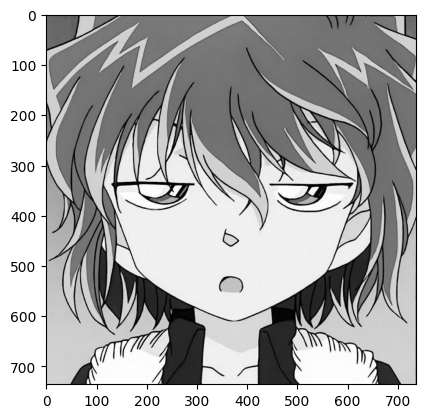

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img = Image.open("/Users/dzlaptops/Downloads/haibara.jpg")

plt.imshow(img)



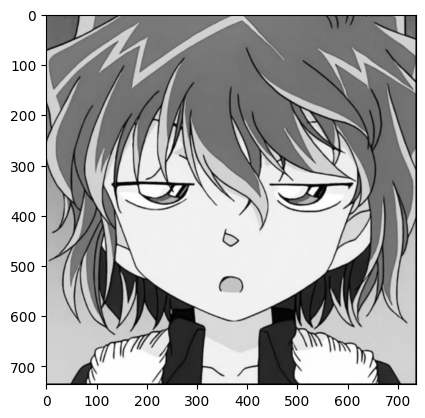

In [3]:
img = Image.open("/Users/dzlaptops/Downloads/haibara.jpg")
img_gray = img.convert("L")
img_np = np.array(img_gray)




noyeau = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
#img_np = np.array(img)
gauss = np.zeros_like(img_np)


for i in range(1, img_np.shape[0]-1):
    for j in range(1, img_np.shape[1]-1):
        gauss[i, j] = np.sum(img_np[i-1:i+2, j-1:j+2] * noyeau)

gaussien = Image.fromarray(gauss.astype(np.uint8))
plt.imshow(gaussien, cmap='gray')

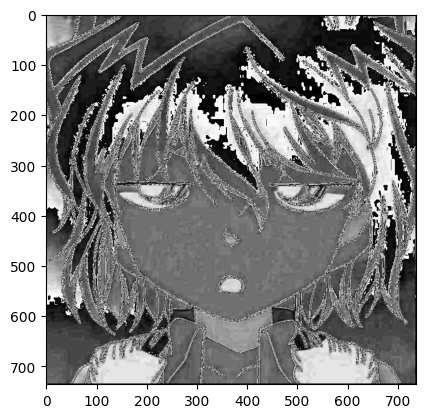

In [42]:
noyeau = np.array([[1, 2, 1]]) / 4
img_np = np.array(img)
gauss = np.zeros_like(img_np)


for i in range(1, img_np.shape[0]-1):
    for j in range(1, img_np.shape[1]-1):
        gauss[i, j] = np.sum(img_np[i-1:i+2, j-1:j+2] * noyeau)

gaussien = Image.fromarray(gauss.astype(np.uint8))
plt.imshow(gaussien)

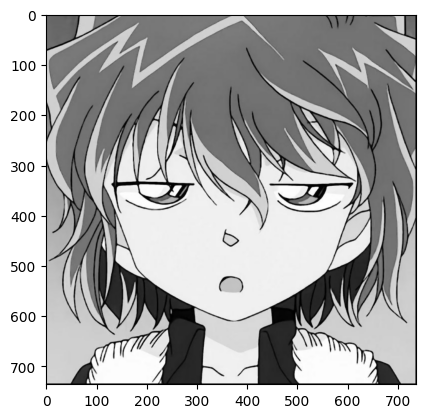

In [43]:
med = np.zeros_like(img_np)
for i in range(1, img_np.shape[0]-1):
    for j in range(1, img_np.shape[1]-1):
        fenetre = img_np[i-1:i+2, j-1:j+2]
        tri = sorted(np.ravel(fenetre))
        med[i, j] = tri[len(tri) // 2]

median = Image.fromarray(med.astype(np.uint8))
plt.imshow(median)

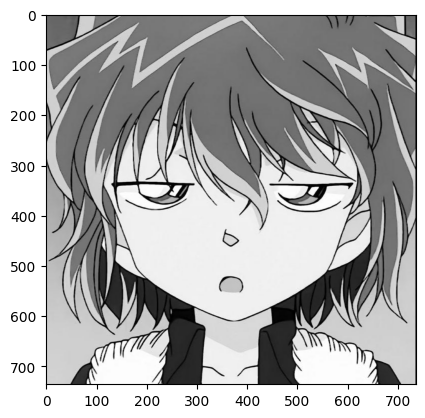

In [52]:
med13 = np.zeros_like(img_np)
for i in range(img_np.shape[0]):
    for j in range(1, img_np.shape[1]-1):
        fen = img_np[i, j-1:j+2] # hna diff entre les taille 
        tri = sorted(np.ravel(fen))
        med13[i, j] = tri[len(tri) // 2]
median13 = Image.fromarray(med13.astype(np.uint8))
plt.imshow(median13)

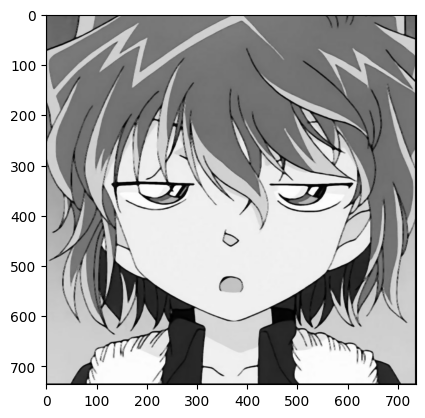

In [45]:
med35 = np.zeros_like(img_np)

for i in range(1, img_np.shape[0]-1):
    for j in range(2, img_np.shape[1]-2):
        f = img_np[i-1:i+2, j-2:j+3]
        trii = sorted(np.ravel(f))
        med35[i, j] = trii[len(trii) // 2]

median35 = Image.fromarray(med35.astype(np.uint8))
plt.imshow(median35)

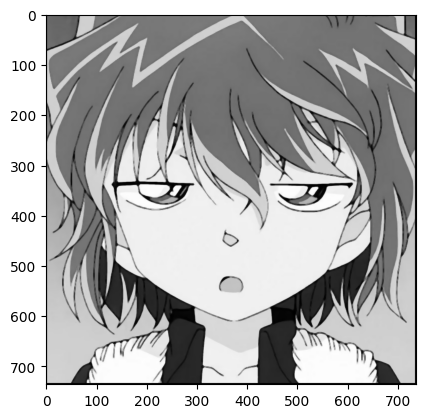

In [53]:
med55 = np.zeros_like(img_np)

for i in range(2, img_np.shape[0]-2):
    for j in range(2, img_np.shape[1]-2):
        fenetre = img_np[i-2:i+3, j-2:j+3]
        tri = sorted(np.ravel(fenetre))
        med55[i, j] = tri[len(tri) // 2]

median55 = Image.fromarray(med55.astype(np.uint8))
plt.imshow(median55)

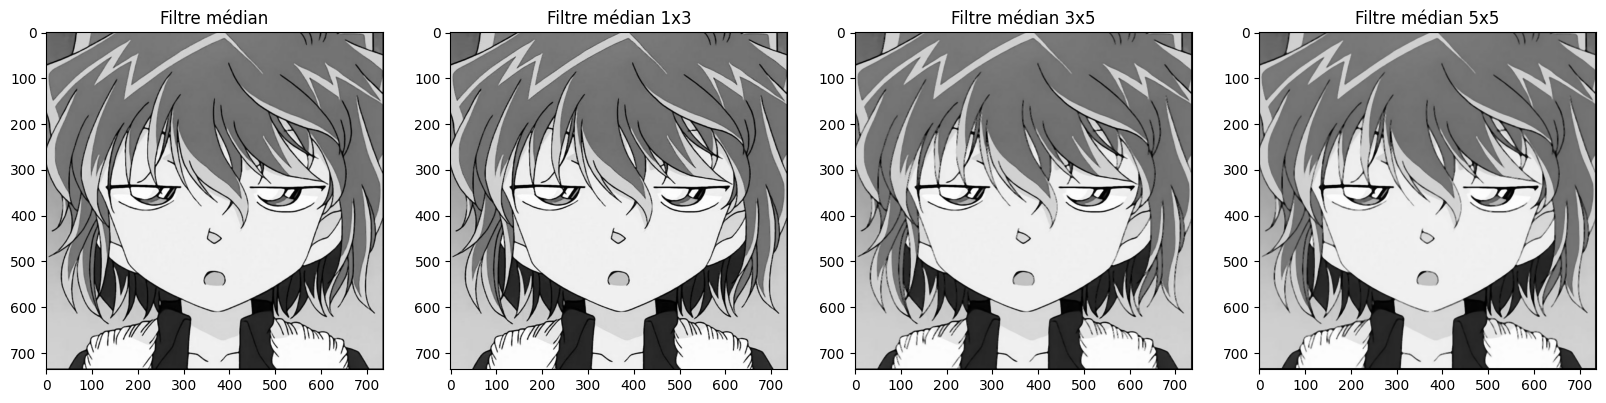

In [55]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(median, cmap='gray')
plt.title('Filtre médian')
plt.subplot(1, 4, 2)
plt.imshow(median13, cmap='gray')
plt.title('Filtre médian 1x3')
plt.subplot(1, 4, 3)
plt.imshow(median35, cmap='gray')
plt.title('Filtre médian 3x5')
plt.subplot(1, 4, 4)
plt.imshow(median55, cmap='gray')
plt.title('Filtre médian 5x5')
plt.show()

In [89]:
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d

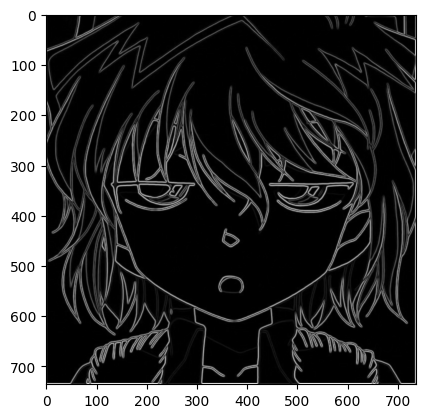

In [90]:
img = Image.open("/Users/dzlaptops/Downloads/haibara.jpg")
img_gray = img.convert("L")
img_np = np.array(img_gray)



#       1-)lissage (nv fe gris + gauss )
noyeau = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
gauss = np.zeros_like(img_np)
for i in range(1, img_np.shape[0]-1):
    for j in range(1, img_np.shape[1]-1):
        gauss[i, j] = np.sum(img_np[i-1:i+2, j-1:j+2] * noyeau)

gaussien = Image.fromarray(gauss.astype(np.uint8))
plt.imshow(gaussien)



#     2_°calculs des gradients    Sobel 

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gradient_x = convolve2d(gaussien, sobel_x, mode='same', boundary='symm')
gradient_y = convolve2d(gaussien, sobel_y, mode='same', boundary='symm')
# sqrt ((gx)**2 +(gy)**2)
gradient_magnitude = np.hypot(gradient_x, gradient_y)
plt.imshow(gradient_magnitude, cmap='gray')
plt.show()

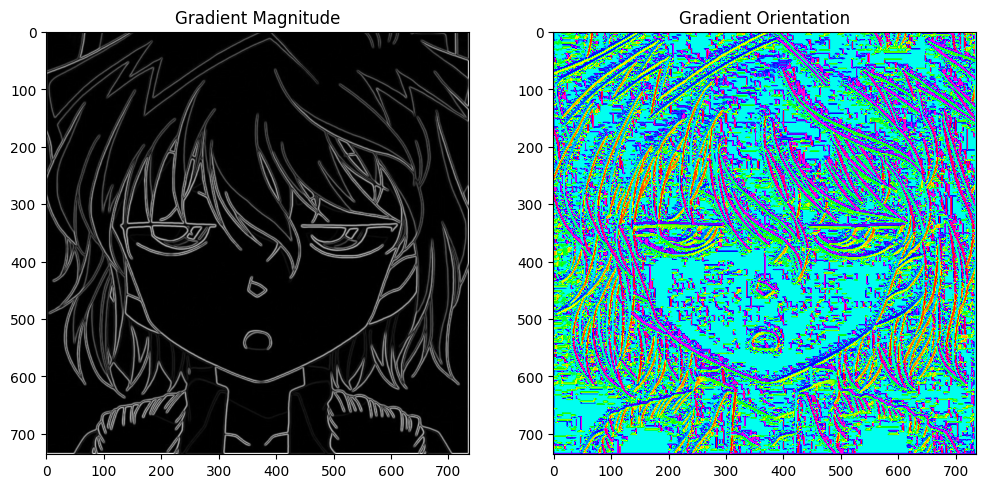

In [88]:
#  l orientation du gradient  : arctan(gy/gx) 
gradient_orientation = np.arctan2(gradient_y, gradient_x)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.subplot(1, 2, 2)
plt.imshow(gradient_orientation, cmap='hsv')  # hsv color map is better for displaying orientation
plt.title('Gradient Orientation')
plt.show()

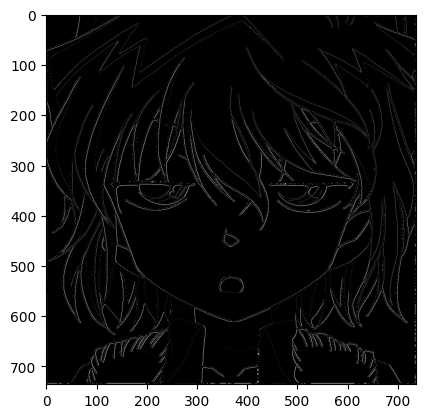

In [92]:
#       3_°supression non maxima locaux

# Initialize the edge map
contour = np.zeros_like(gradient_magnitude)

# Quantize the gradient orientation to 4 directions (horizontal, vertical, and two diagonals)
quantized_orientation = (4 * gradient_orientation / (2*np.pi) + 0.5).astype(int) % 4

# Define the offsets for the neighbors in each direction
offsets = [(-1, 0), (0, 1), (-1, 1), (-1, -1)]

# Perform non-maximum suppression
for x in range(1, gradient_magnitude.shape[0]-1):
    for y in range(1, gradient_magnitude.shape[1]-1):
        direction = quantized_orientation[x, y]
        offset_x, offset_y = offsets[direction]
        if gradient_magnitude[x, y] >= gradient_magnitude[x + offset_x, y + offset_y] and \
           gradient_magnitude[x, y] >= gradient_magnitude[x - offset_x, y - offset_y]:
            contour[x, y] = gradient_magnitude[x, y]

# Display the edge map
plt.imshow(contour, cmap='gray')
plt.show()

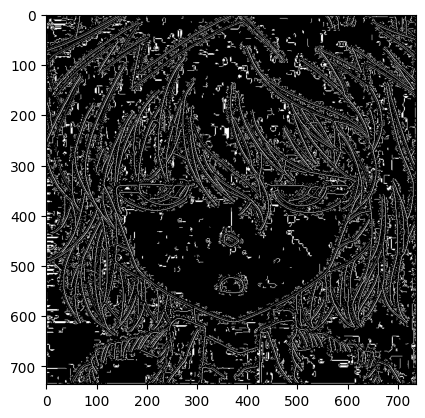

In [94]:
#seuillage hesteresis 


Smax = np.percentile(contour, 90)
Smin = Smax / 2

# 1 
contour_forte = (contour >= Smax)


for x in range(1, contour.shape[0]-1):
    for y in range(1, contour.shape[1]-1):
        if (contour[x, y] >= Smin) and (contour[x, y] < Smax):
            # 3
            if np.any(contour_forte[x-1:x+2, y-1:y+2]):
                contour_forte[x, y] = True


plt.imshow(contour_forte, cmap='gray')
plt.show()

In [101]:
# pour voir les valeurs du gradient pour ajuster 
print(contour)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.         451.13634303 425.0105881  ... 423.05791566 449.72880717
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.         844.           0.         ...   0.           0.
    0.        ]
 [  0.         895.19718498   0.         ...   0.         853.44595611
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


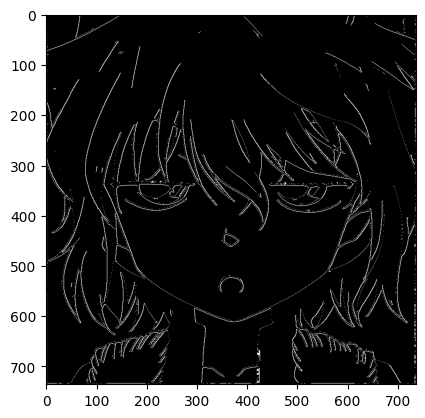

In [106]:
#ajuster les seuils pour meilleur resultat 


Smax = 400
Smin = 10

# 1 
contour_forte = (contour >= Smax)


for x in range(1, contour.shape[0]-1):
    for y in range(1, contour.shape[1]-1):
        if (contour[x, y] >= Smin) and (contour[x, y] < Smax):
            # 3
            if np.any(contour_forte[x-1:x+2, y-1:y+2]):
                contour_forte[x, y] = True


plt.imshow(contour_forte, cmap='gray')
plt.show()

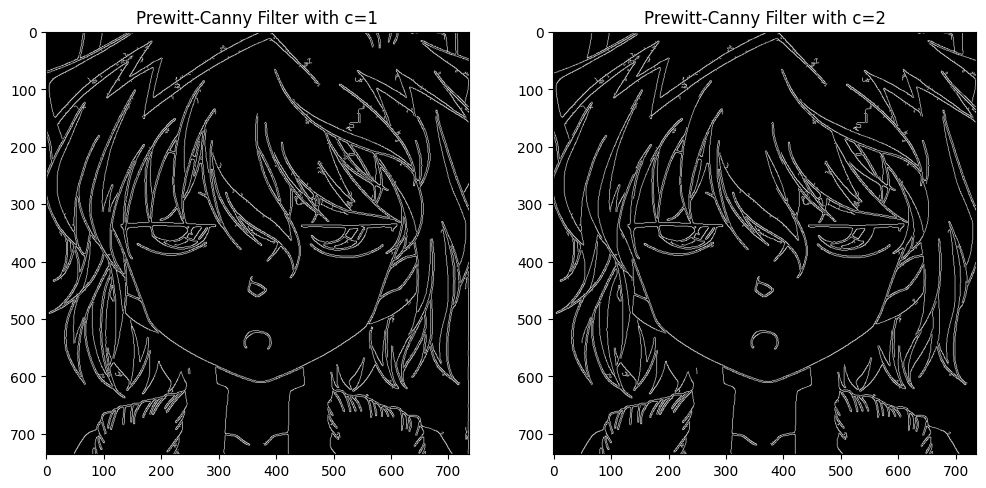

In [107]:
import numpy as np
from scipy.ndimage import convolve, gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt

def prewitt_canny(image, c):
    # Define the Prewitt kernels
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Convolve the image with the Prewitt kernels
    gradient_x = convolve(image, prewitt_x)
    gradient_y = convolve(image, prewitt_y)

    # Calculate the magnitude of the gradient
    gradient_magnitude = c * np.hypot(gradient_x, gradient_y)

    # Apply non-maximum suppression
    edges = np.zeros_like(gradient_magnitude)
    quantized_orientation = (4 * np.arctan2(gradient_y, gradient_x) / (2*np.pi) + 0.5).astype(int) % 4
    offsets = [(-1, 0), (0, 1), (-1, 1), (-1, -1)]
    for x in range(1, gradient_magnitude.shape[0]-1):
        for y in range(1, gradient_magnitude.shape[1]-1):
            direction = quantized_orientation[x, y]
            offset_x, offset_y = offsets[direction]
            if gradient_magnitude[x, y] >= gradient_magnitude[x + offset_x, y + offset_y] and \
               gradient_magnitude[x, y] >= gradient_magnitude[x - offset_x, y - offset_y]:
                edges[x, y] = gradient_magnitude[x, y]

    # Perform hysteresis thresholding
    high_threshold = np.percentile(edges, 90)
    low_threshold = high_threshold / 2
    strong_edges = (edges >= high_threshold)
    for x in range(1, edges.shape[0]-1):
        for y in range(1, edges.shape[1]-1):
            if (edges[x, y] >= low_threshold) and (edges[x, y] < high_threshold):
                if np.any(strong_edges[x-1:x+2, y-1:y+2]):
                    strong_edges[x, y] = True

    return strong_edges

# Load the image
img = Image.open("/Users/dzlaptops/Downloads/haibara.jpg").convert("L")
img_np = np.array(img)

# Apply the Prewitt-Canny filter with c=1 and c=2
edges1 = prewitt_canny(img_np, 1)
edges2 = prewitt_canny(img_np, 2)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(edges1, cmap='gray')
plt.title('Prewitt-Canny Filter with c=1')

plt.subplot(1, 2, 2)
plt.imshow(edges2, cmap='gray')
plt.title('Prewitt-Canny Filter with c=2')

plt.show()

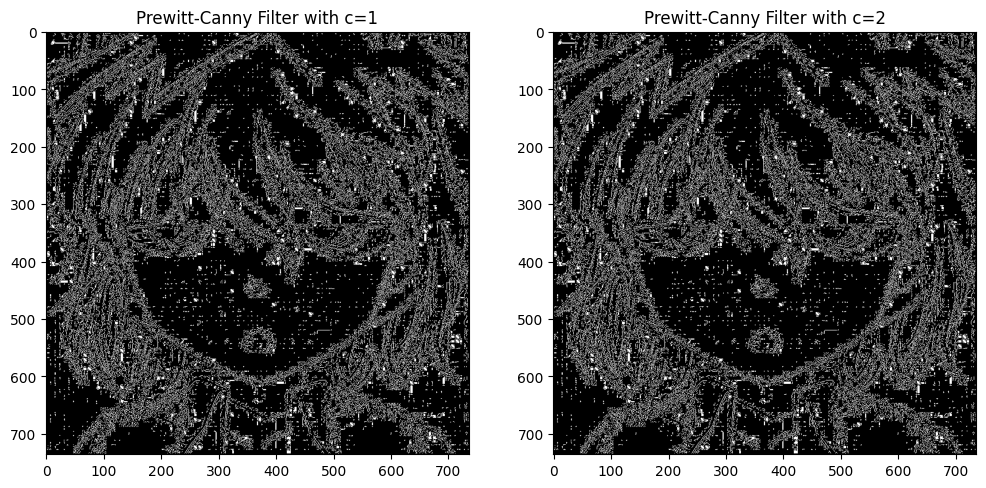

In [110]:
import numpy as np
from scipy.ndimage import convolve, gaussian_filter
from PIL import Image
import matplotlib.pyplot as plt

def prewitt_canny(image, c):
    # Define the Prewitt kernels
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Convolve the image with the Prewitt kernels
    gradient_x = convolve(image, prewitt_x)
    gradient_y = convolve(image, prewitt_y)

    # Calculate the magnitude of the gradient
    gradient_magnitude = c * np.hypot(gradient_x, gradient_y)

    # Apply non-maximum suppression
    edges = np.zeros_like(gradient_magnitude)
    quantized_orientation = (4 * np.arctan2(gradient_y, gradient_x) / (2*np.pi) + 0.5).astype(int) % 4
    offsets = [(-1, 0), (0, 1), (-1, 1), (-1, -1)]
    for x in range(1, gradient_magnitude.shape[0]-1):
        for y in range(1, gradient_magnitude.shape[1]-1):
            direction = quantized_orientation[x, y]
            offset_x, offset_y = offsets[direction]
            if gradient_magnitude[x, y] >= gradient_magnitude[x + offset_x, y + offset_y] and \
               gradient_magnitude[x, y] >= gradient_magnitude[x - offset_x, y - offset_y]:
                edges[x, y] = gradient_magnitude[x, y]

    # Perform hysteresis thresholding
    high_threshold = np.percentile(edges, 90)
    low_threshold = high_threshold / 2
    strong_edges = (edges >= high_threshold)
    for x in range(1, edges.shape[0]-1):
        for y in range(1, edges.shape[1]-1):
            if (edges[x, y] >= low_threshold) and (edges[x, y] < high_threshold):
                if np.any(strong_edges[x-1:x+2, y-1:y+2]):
                    strong_edges[x, y] = True

    return strong_edges

# Load the image
img = Image.open("/Users/dzlaptops/Downloads/haibara.jpg").convert("L")
img_np = np.array(img)

# Apply the Prewitt-Canny filter with c=1 and c=2
edges1 = prewitt_canny(img_np, 1)
edges2 = prewitt_canny(img_np, 2)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(edges1, cmap='gray')
plt.title('Prewitt-Canny Filter with c=1')

plt.subplot(1, 2, 2)
plt.imshow(edges2, cmap='gray')
plt.title('Prewitt-Canny Filter with c=2')

plt.show()